### Problem 4

We now want to make a plot of the TTVs of GJ 876 c over 4 years. We will assume the orbits are edge-on with $i=90$, so that planet c would be seen to transit.

In [18]:
import numpy as np
import math
import time
import tqdm
import os
from scipy.optimize import minimize
import astropy.constants as const
from astropy import units as u
import rebound

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rc
plt.style.use('classic')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size':20})
rc('text', usetex=True)
rc('figure', facecolor='w')
rc('xtick', labelsize=20)
rc('ytick', labelsize=20)

G = 6.674e-8

In [19]:
def inclination_mass(inc, mp):
    
    return mp * np.sin(i)/np.sin(inc)

In [20]:
# Stellar parameters
mstar = .32 

# Planet parameters [b, c, d, e]
planets = 4
# P = np.array([61.1166, 30.0881, 1.937780, 124.26])
# a = np.array([0.208317, 0.129590, 0.02080665, 0.3343])
# e = np.array([0.0324, 0.25591, 0.207, 0.055])
# mass = np.array([2.2756, 0.7142, 0.021, 0.046]) * const.M_jup.value / const.M_sun.value
# w = np.array([50.3, 48.76, 234, 239]) * math.pi/180
# M = np.array([325.7, 294.59, 355, 335]) * math.pi/180
# K = np.array([213.86, 88.72, 6.60, 3.42])
i = 59 * 180 / np.pi

# Planet parameters [d, c, b, e]
P = np.array([1.937780, 30.0881, 61.1166, 124.26])
a = np.array([0.02080665, 0.129590, 0.208317, 0.3343])
e = np.array([0.207, 0.25591, 0.0324, 0.055])
mass = np.array([0.021, 0.7142, 2.2756, 0.046]) * const.M_jup.value / const.M_sun.value
w = np.array([234, 48.76, 50.3, 239]) * np.pi/180
M = np.array([355, 294.59, 325.7, 335]) * np.pi/180
K = np.array([6.60, 88.72, 213.86, 3.42])

In [22]:
sim = rebound.Simulation()

sim.add(m=mstar)
for k in range(planets):
    sim.add(m=inclination_mass(np.pi/2, mass[k]), e=e[k], a=a[k], omega=w[k], M=M[k]) 
sim.move_to_com()

N = 200  # Integrate over 4 transits for planet b
transittimes = np.zeros(N)
p = sim.particles

j = 0 # Start the counter
while j < N:
    y_old = p[2].y - p[0].y  
    t_old = sim.t
    sim.integrate(sim.t+0.5) # check for transits every 0.5 time units. Note that 0.5 is shorter than one orbit
    t_new = sim.t
    if y_old*(p[2].y-p[0].y)<0. and p[2].x-p[0].x>0.:   # sign changed (y_old*y<0), planet in front of star (x>0)
        while t_new-t_old>1e-7:   # bisect until prec of 1e-5 reached
            if y_old*(p[2].y-p[0].y)<0.:
                t_new = sim.t
            else:
                t_old = sim.t
            sim.integrate( (t_new+t_old)/2.)
        transittimes[j] = sim.t
        j += 1
        sim.integrate(sim.t+0.05)       # integrate 0.05 to be past the transit
        
A = np.vstack([np.ones(N), range(N)]).T
c, m = np.linalg.lstsq(A, transittimes)[0]

/Users/samanthagilbert/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


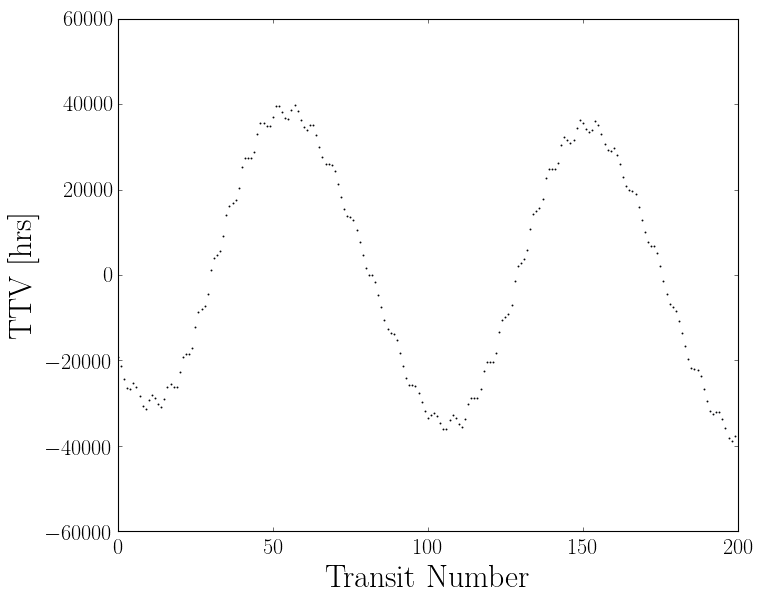

In [23]:
fig = plt.figure(figsize=[10,8])
ax = plt.axes()
#ax.set_ylim([-1,1])
ax.set_xlim([0,N])
ax.set_xlabel("Transit Number", fontsize='x-large')
ax.set_ylabel("TTV [hrs]", fontsize='x-large')
plt.scatter(range(N), (transittimes-m*np.array(range(N))-c)*(24.*365./2./np.pi), s = 0.5);

In [24]:
print(transittimes[0:200])

[  10.68868324   15.45189815   19.69346589   24.43799009   30.69314377
   37.9647038    43.7331356    48.4949824    53.26621991   59.05447866
   66.85169575   74.14766483   79.94474459   85.24675229   91.05689005
   98.87329775  107.19666548  114.03564576  119.86432301  126.20104409
  135.0528473   143.90901648  150.75755001  157.11467996  164.48511795
  174.35898501  183.23891355  190.10216973  196.98493397  205.37175782
  215.76016048  224.14154814  231.01335621  237.88710388  246.77753
  256.64728391  264.50918104  271.38140616  278.250041    286.62316133
  296.49052987  304.34392612  310.68778474  317.03174641  324.3761196
  333.72796708  342.07509186  348.412545    354.23332399  360.54701496
  368.3597627   376.67059391  382.97740579  388.27139159  393.55505316
  399.84576643  407.637262    414.92930535  420.20314103  424.97091849
  430.24997863  436.00625913  443.27112777  449.52269473  454.26641927
  458.50471044  463.26330807  468.50942383  474.74600797  480.97779567
  486.2255